In [138]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
%matplotlib inline
dataset = load_breast_cancer()
data = dataset.data # входные данные 
target = dataset.target # выходные данные
data_df = pd.DataFrame(data=data, columns=dataset.feature_names)
data_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [139]:
list(dataset.target_names)


['malignant', 'benign']

In [140]:

X = data_df.values


Для описания формы случайного вектора необходима ковариационная матрица.

Это матрица, у которой (i,j)-элемент является корреляцией признаков (Xi, Xj).

Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия. Итак, сформируем ковариационную матрицу Σ для нашей выборки. Для этого посчитаем дисперсии Xi и Xj, а также их ковариацию.

Направление максимальной дисперсии у проекции всегда совпадает с айгенвектором, имеющим максимальное собственное значение, равное величине этой дисперсии.
Размерность нашей выборки равна 30 и количество айгенвекторов у нее, соответственно, 30. Найдем их.
В библиотеке numpy реализована функция numpy.linalg.eig(X), где X – квадратная матрица. Она возвращает 2 массива – массив айгензначений и массив айгенвекторов (векторы-столбцы).

Наибольший вектор имеет направление, схожее с линией регрессии и, спроецировав на него нашу выборку, мы потеряем информацию, сравнимую с суммой остаточных членов регрессии (только расстояние теперь евклидово, а не дельта по Y).

Часто требуется оценить объем потерянной (и сохраненной) информации. Удобнее всего представить в процентах. Мы берем дисперсии по каждой из осей и делим на общую сумму дисперсий по осям (т.е. сумму всех собственных чисел ковариационной матрицы).

In [141]:
from yellowbrick.features import PCA as PCAVIS
n_components = 3
# Нормализовать данные, вычитая для каждого значения в колонке среднее значения этой колонки (X.mean())
normalized_data = X - np.mean(X, axis=0)
table = pd.DataFrame(data=normalized_data, columns=dataset.feature_names)
table


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,...,9.11081,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954
1,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,...,8.72081,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074
2,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,...,7.30081,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634
3,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,...,-1.35919,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054
4,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,...,6.27081,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,7.432708,3.100351,50.030967,824.110896,0.01464,0.011559,0.155101,0.089981,-0.008562,-0.006568,...,9.18081,0.722777,58.838787,1146.416872,0.008631,-0.042965,0.138512,0.106994,-0.084076,-0.012796
565,6.002708,8.960351,39.230967,606.110896,0.00144,-0.000941,0.055201,0.048991,-0.005962,-0.007468,...,7.42081,12.572777,47.738787,850.416872,-0.015769,-0.062065,0.049312,0.048194,-0.032876,-0.017576
566,2.472708,8.790351,16.330967,203.210896,-0.01181,-0.002041,0.003711,0.004101,-0.022162,-0.006318,...,2.71081,8.442777,19.438787,243.416872,-0.018469,0.055135,0.068112,0.027194,-0.068276,-0.005746
567,6.472708,10.040351,48.130967,610.110896,0.02144,0.172659,0.262601,0.103081,0.058538,0.007362,...,9.47081,13.742777,77.338787,940.416872,0.032631,0.613835,0.666512,0.150394,0.118624,0.040054


[[1160.1425737  -293.91754364   48.57839763]
 [1269.12244319   15.63018184  -35.39453423]
 [ 995.79388896   39.15674324   -1.70975298]
 ...
 [ 314.50175618   47.55352518  -10.44240718]
 [1124.85811531   34.12922497  -19.74208742]
 [-771.52762188  -88.64310636   23.88903189]]


c:\Users\kirill\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


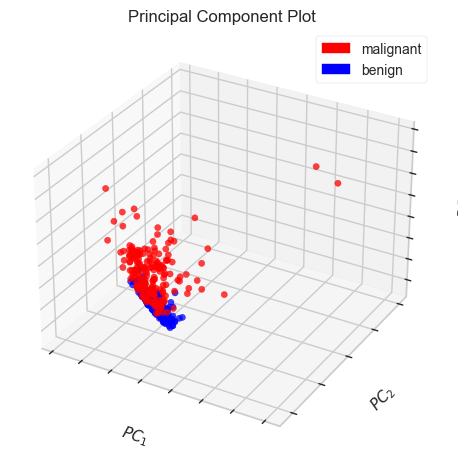

<Axes3DSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [142]:

# Построить матрицу ковариации, используя метод NumPy cov()
covariance_matrix = np.cov(normalized_data.T)

# Диагонализировать матрицу методом NumPy linalg.eig()
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# Отсортировать векторы, используя встроенный метод argsort()
sorted_indices = np.argsort(eig_values)[::-1]
sorted_vectors = eig_vectors[:, sorted_indices]

# Используя синтаксис слайсинга, оставить N главных компонент
selected_vectors = sorted_vectors[:, :n_components]

# Используя метод dot(), модифицировать исходные нормализованные данные
modified_data = np.dot(normalized_data, selected_vectors)
# Вернуть данные сниженной размерности
print(modified_data)


visualizer = PCAVIS(scale=True, projection=3, classes=dataset.target_names, colors=['red', 'blue'])
visualizer.fit_transform(modified_data, dataset.target)
visualizer.show()

Нормализуем данные с помощью z-score. Нормализация Z-оценки относится к процессу нормализации каждого значения в наборе данных, так что среднее значение всех значений равно 0, а стандартное отклонение равно 1.

[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


Text(0, 0.5, 'Explained Variance %')

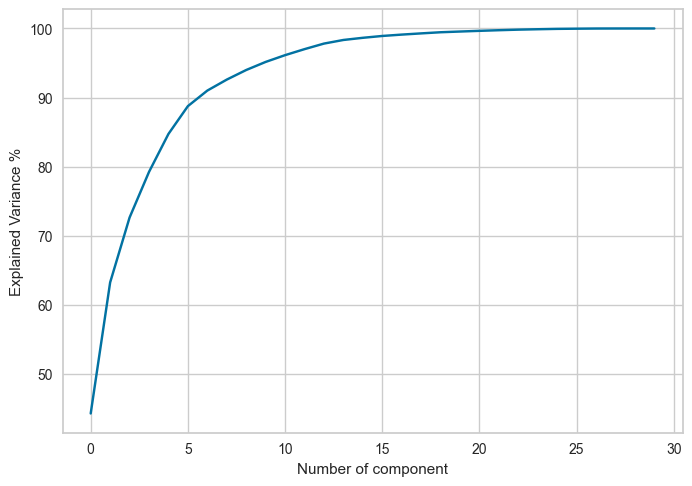

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_Scaled = scaler.transform(X)

pca_30 = PCA(n_components=30)
pca_30.fit(X_Scaled)
X_pca_30 = pca_30.transform(X_Scaled)
print(np.cumsum(pca_30.explained_variance_ratio_ * 100))
plt.plot(np.cumsum(pca_30.explained_variance_ratio_ * 100))
plt.xlabel("Number of component")
plt.ylabel("Explained Variance %")

Исходя из графика выше, 2d диаграмма рассеяния с использованием первых двух главных компонент, объяснит только 63,24% изменчивости в данных, а 3d диаграмма объяснит 72.64% измененчивости.

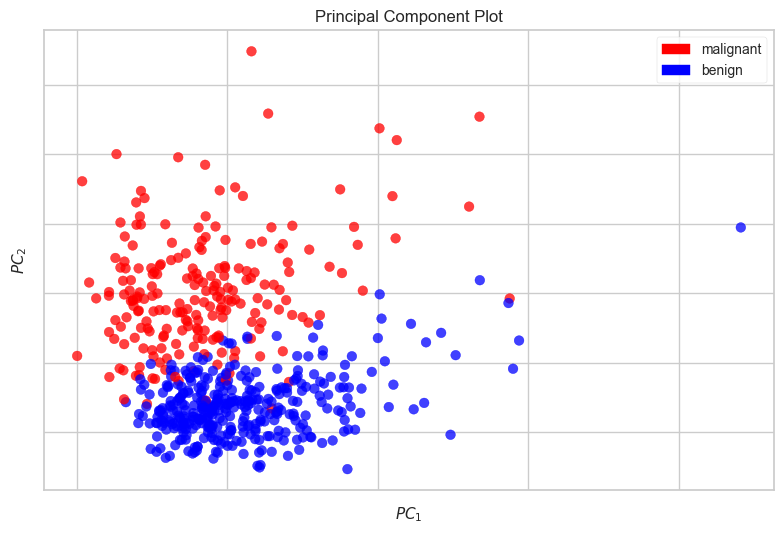

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [144]:
from yellowbrick.features import PCA as PCAVIS
pca_2d = PCA(n_components=3)
pca_2d.fit(X_Scaled)
X_pca_2d = pca_2d.transform(X_Scaled)
visualizer = PCAVIS(scale=True, projection=2, classes=dataset.target_names, colors=['red', 'blue'])
visualizer.fit_transform(X_pca_2d, dataset.target)
visualizer.show()

c:\Users\kirill\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


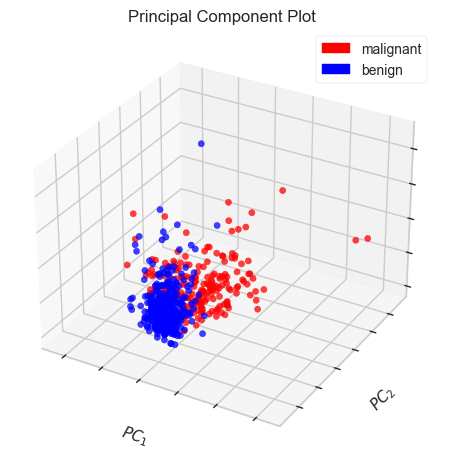

<Axes3DSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [145]:
pca_3d = PCA(n_components=3)
pca_3d.fit(X_Scaled)
X_pca_3d = pca_3d.transform(X_Scaled)
visualizer = PCAVIS(scale=True, projection=3, classes=dataset.target_names, colors=['red','blue'])
visualizer.fit_transform(X_pca_3d, target)
visualizer.show()
